Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("../skin-cancer-isic-the-international-skin-imaging-collaboration/train")
data_dir_test = pathlib.Path('../skin-cancer-isic-the-international-skin-imaging-collaboration/test')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

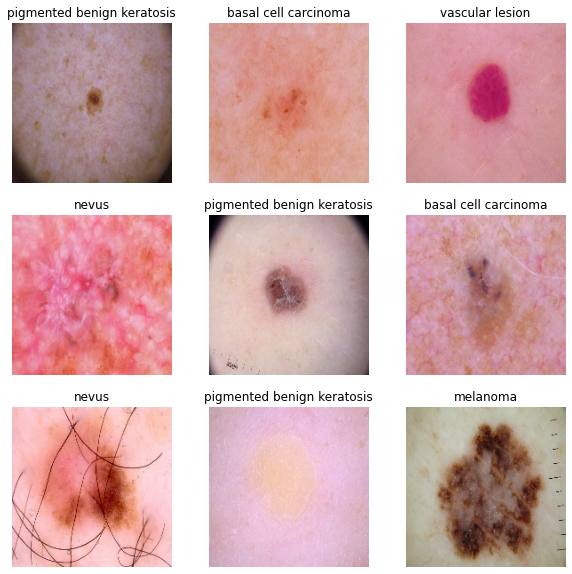

In [15]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [17]:
### Your code goes here

num_classes = 9

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [18]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [20]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 49s 762ms/step - loss: 1.9752 - accuracy: 0.2494 - val_loss: 1.8137 - val_accuracy: 0.3221
Epoch 2/20
56/56 [==============================] - 37s 656ms/step - loss: 1.5937 - accuracy: 0.4235 - val_loss: 1.6504 - val_accuracy: 0.4541
Epoch 3/20
56/56 [==============================] - 41s 725ms/step - loss: 1.4239 - accuracy: 0.4978 - val_loss: 1.4002 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 36s 651ms/step - loss: 1.2963 - accuracy: 0.5458 - val_loss: 1.3791 - val_accuracy: 0.5324
Epoch 5/20
56/56 [==============================] - 38s 679ms/step - loss: 1.2009 - accuracy: 0.5792 - val_loss: 1.5293 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 36s 645ms/step - loss: 1.1976 - accuracy: 0.5737 - val_loss: 1.3916 - val_accuracy: 0.5213
Epoch 7/20
56/56 [==============================] - 32s 567ms/step - loss: 1.1489 - accuracy: 0.5971 - val_loss: 1.5759 - val_accuracy: 0.4989

### Visualizing training results

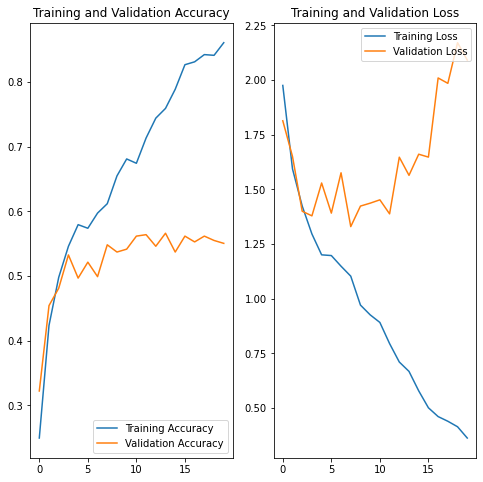

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [23]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

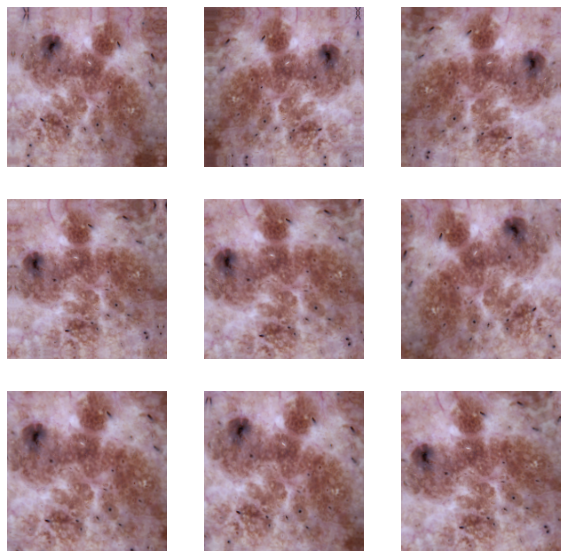

In [24]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [26]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

### Compiling the model

In [27]:
## Your code goes here
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

### Training the model

In [30]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 76s 1s/step - loss: 2.0956 - accuracy: 0.2288 - val_loss: 2.0503 - val_accuracy: 0.2013
Epoch 2/20
56/56 [==============================] - 49s 867ms/step - loss: 1.7436 - accuracy: 0.3544 - val_loss: 1.5575 - val_accuracy: 0.4564
Epoch 3/20
56/56 [==============================] - 48s 848ms/step - loss: 1.5492 - accuracy: 0.4570 - val_loss: 1.4914 - val_accuracy: 0.5078
Epoch 4/20
56/56 [==============================] - 50s 892ms/step - loss: 1.4705 - accuracy: 0.4760 - val_loss: 1.4313 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 48s 866ms/step - loss: 1.3757 - accuracy: 0.5140 - val_loss: 1.4391 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 50s 900ms/step - loss: 1.3287 - accuracy: 0.5246 - val_loss: 1.3250 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 48s 858ms/step - loss: 1.2332 - accuracy: 0.5597 - val_loss: 1.3557 - val_accuracy: 0.5324
Ep

### Visualizing the results

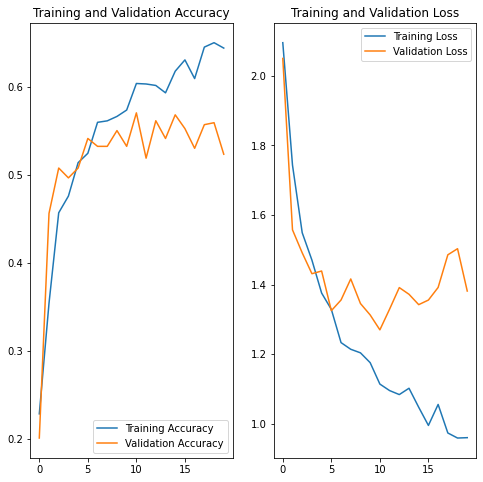

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [32]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(len(lesion_list))

2239


In [33]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('..\\skin-cancer-isic-the-international-skin-imaging-collaboration\\train\\actinic keratosis\\ISIC_0025780.jpg', 'actinic keratosis'), ('..\\skin-cancer-isic-the-international-skin-imaging-collaboration\\train\\actinic keratosis\\ISIC_0025803.jpg', 'actinic keratosis')]


In [34]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,..\skin-cancer-isic-the-international-skin-ima...,actinic keratosis
1,..\skin-cancer-isic-the-international-skin-ima...,actinic keratosis
2,..\skin-cancer-isic-the-international-skin-ima...,actinic keratosis
3,..\skin-cancer-isic-the-international-skin-ima...,actinic keratosis
4,..\skin-cancer-isic-the-international-skin-ima...,actinic keratosis


In [35]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,..\skin-cancer-isic-the-international-skin-ima...,actinic keratosis
1,..\skin-cancer-isic-the-international-skin-ima...,actinic keratosis
2,..\skin-cancer-isic-the-international-skin-ima...,actinic keratosis
3,..\skin-cancer-isic-the-international-skin-ima...,actinic keratosis
4,..\skin-cancer-isic-the-international-skin-ima...,actinic keratosis


In [36]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

In [37]:
original_df[['Label']].value_counts(normalize=True)

Label                     
pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
dtype: float64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [38]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 78.5/78.5 kB 2.1 MB/s eta 0:00:00
     -------------------------------------- 829.2/829.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=3439c44d809cf025361b852400af8aa26d5f7ff65304cf682a8a2045a0e72b35
  Stored in directory: c:\users\sjohari\appdata\local\pip\cache\wheels\2f\a0\d3\4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
Successfully built future


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [41]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to ..\skin-cancer-isic-the-international-skin-imaging-collaboration\train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25295F17AF0>: 100%|██████████| 500/500 [00:05<00:00, 86.77 Samples/s]                   


Initialised with 376 image(s) found.
Output directory set to ..\skin-cancer-isic-the-international-skin-imaging-collaboration\train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x252963832B0>: 100%|██████████| 500/500 [00:06<00:00, 77.61 Samples/s]                   


Initialised with 95 image(s) found.
Output directory set to ..\skin-cancer-isic-the-international-skin-imaging-collaboration\train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25294F16C10>: 100%|██████████| 500/500 [00:05<00:00, 94.53 Samples/s]                   


Initialised with 438 image(s) found.
Output directory set to ..\skin-cancer-isic-the-international-skin-imaging-collaboration\train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2529638B1F0>: 100%|██████████| 500/500 [00:31<00:00, 15.68 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to ..\skin-cancer-isic-the-international-skin-imaging-collaboration\train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x2528FC8DC70>: 100%|██████████| 500/500 [00:27<00:00, 18.03 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to ..\skin-cancer-isic-the-international-skin-imaging-collaboration\train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25294F2CC10>: 100%|██████████| 500/500 [00:06<00:00, 71.98 Samples/s]                   


Initialised with 77 image(s) found.
Output directory set to ..\skin-cancer-isic-the-international-skin-imaging-collaboration\train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2528FE88160>: 100%|██████████| 500/500 [00:14<00:00, 35.06 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to ..\skin-cancer-isic-the-international-skin-imaging-collaboration\train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25296378A60>: 100%|██████████| 500/500 [00:06<00:00, 74.63 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to ..\skin-cancer-isic-the-international-skin-imaging-collaboration\train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2528FC9A0D0>: 100%|██████████| 500/500 [00:06<00:00, 75.37 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [42]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [43]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:2]

['..\\skin-cancer-isic-the-international-skin-imaging-collaboration\\train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0427e5ba-1724-43f9-add2-64185391e2bc.jpg',
 '..\\skin-cancer-isic-the-international-skin-imaging-collaboration\\train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_f9bbf99e-f5ce-4f4c-ab15-38f8e20be986.jpg']

In [44]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:2]

['actinic keratosis', 'actinic keratosis']

In [46]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [47]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df.shape

(6739, 2)

In [48]:
from cv2 import normalize


new_df['Label'].value_counts(normalize=True)

pigmented benign keratosis    0.142751
melanoma                      0.139190
basal cell carcinoma          0.129990
nevus                         0.127170
squamous cell carcinoma       0.101054
vascular lesion               0.094821
actinic keratosis             0.091111
dermatofibroma                0.088292
seborrheic keratosis          0.085621
Name: Label, dtype: float64

In [49]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [52]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [54]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [55]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [57]:
## your code goes here
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [60]:
## your code goes here
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

#### **Todo:**  Train your model

In [61]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 150s 845ms/step - loss: 1.8206 - accuracy: 0.2941 - val_loss: 1.5881 - val_accuracy: 0.4120
Epoch 2/30
169/169 [==============================] - 136s 803ms/step - loss: 1.5076 - accuracy: 0.4191 - val_loss: 1.3982 - val_accuracy: 0.4714
Epoch 3/30
169/169 [==============================] - 157s 929ms/step - loss: 1.4089 - accuracy: 0.4547 - val_loss: 1.3134 - val_accuracy: 0.5160
Epoch 4/30
169/169 [==============================] - 138s 807ms/step - loss: 1.2923 - accuracy: 0.5141 - val_loss: 1.3126 - val_accuracy: 0.5174
Epoch 5/30
169/169 [==============================] - 160s 943ms/step - loss: 1.2177 - accuracy: 0.5367 - val_loss: 1.2087 - val_accuracy: 0.5212
Epoch 6/30
169/169 [==============================] - 140s 822ms/step - loss: 1.1557 - accuracy: 0.5660 - val_loss: 1.1706 - val_accuracy: 0.5724
Epoch 7/30
169/169 [==============================] - 145s 848ms/step - loss: 1.1082 - accuracy: 0.5822 - val_loss: 1.0793 -

#### **Todo:**  Visualize the model results

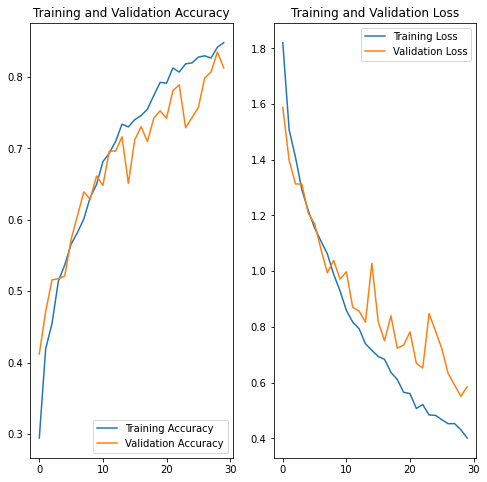

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
* model performance improved on Training and Validation  by Class rebalanced
* no sign of underfitting and Overfitting
* low difference between traiing and validation accuracy, with epochs 30

